# Example: Apple Inc. (AAPL) stock data using the `yfinance` library

Make sure you have the `yfinance` and `matplotlib` libraries installed in your environment before running this code. You can install them using the following commands:

[Note: `#` is used for commenting in Python. Delete this symbol if you want the code to be executed. Insert this symbol in from of the code to comment it out]
b

In [3]:
!pip install yfinance
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.3 MB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency 

In [65]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Download stock data
ticker = 'AAPL' # consider generalizing your code so it can be easily tweaked (for example, to analyze another stock)
stock_data = yf.download('AAPL', start='2016-01-01', end='2024-08-20')

[*********************100%***********************]  1 of 1 completed


In [49]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.886835,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.288246,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.832499,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.868872,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,21.984501,283192000
...,...,...,...,...,...,...
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000


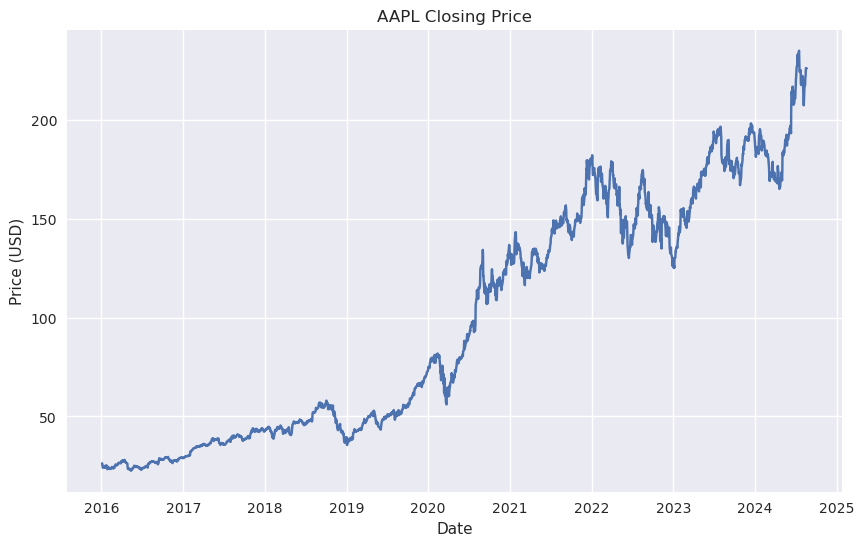

In [51]:
# Plot the closing price
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

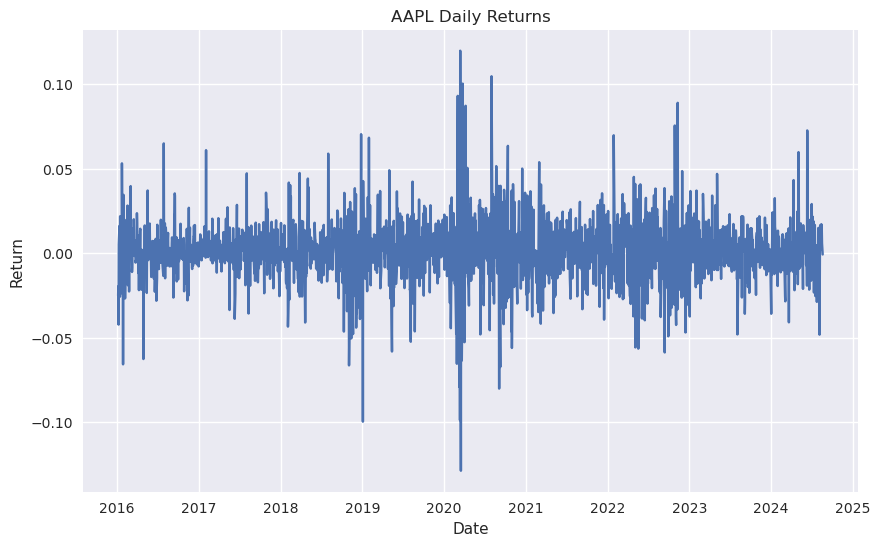

In [53]:
# Calculate daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Daily Return'])
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()

# Calculating Technical Indicators

Technical indicators are used to predict future price movements.

In [56]:
# Calculate the 20 and 50 days moving averages of the closing prices
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

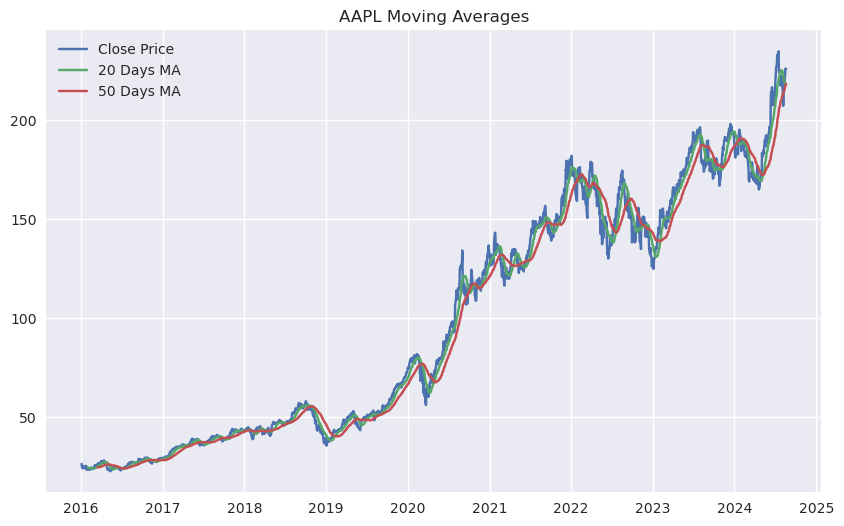

In [58]:
# Plot the moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA20'], label='20 Days MA')
plt.plot(stock_data['MA50'], label='50 Days MA')
plt.title(f"{ticker} Moving Averages")
plt.legend()
plt.show()

# Statistical Analysis

You can perform basic statistical analysis to get insights into the stoc'’s performance.

In [61]:
# Descriptive statistics
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA20,MA50
count,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03,2170.000000,2152.000000,2122.000000
mean,98.154838,99.225333,97.164925,98.243215,96.297755,1.095977e+08,0.001158,98.033984,97.685976
std,60.144564,60.798579,59.538429,60.195966,60.556909,5.775759e+07,0.018282,59.616400,58.632136
min,22.500000,22.917500,22.367500,22.584999,20.720034,2.404830e+07,-0.128647,23.507750,23.938800
25%,42.590000,42.955000,42.252501,42.573750,40.296917,7.126770e+07,-0.007436,42.812344,42.857887
50%,79.169998,79.889999,78.462502,79.422501,77.233879,9.583960e+07,0.001001,78.464562,76.529750
75%,152.139999,154.074997,150.299995,152.199997,150.366493,1.306592e+08,0.010161,150.687625,151.407150
max,236.479996,237.229996,233.089996,234.820007,234.548523,5.334788e+08,0.119808,225.207500,218.254201


In [67]:
# Volatility calculation
stock_data['Log_Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
volatility = stock_data['Log_Return'].std() * np.sqrt(252)  # Annualized volatility
print(f"The annualized volatility of {ticker} stock is: {volatility:.2%}")

The annualized volatility of AAPL stock is: 29.03%


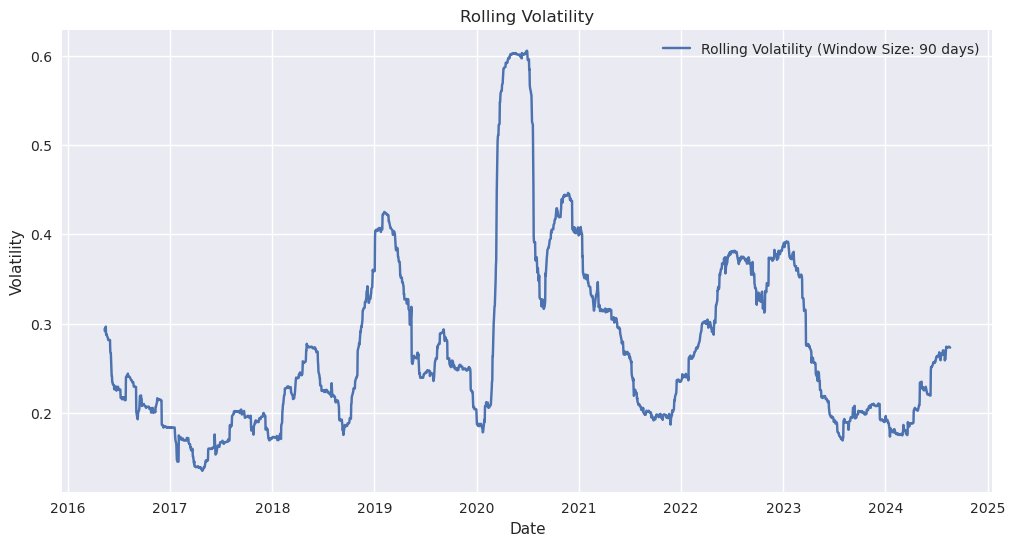

In [69]:
# Function to calculate rolling volatility
def calculate_rolling_volatility(data, window_size=90):
    rolling_volatility = data['Log_Return'].rolling(window=window_size).std() * np.sqrt(252)
    return rolling_volatility

# Calculate rolling volatility with a 90-day window
stock_data['Rolling_Volatility'] = calculate_rolling_volatility(stock_data, window_size=90)

# Plotting the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Rolling_Volatility'], label=f'Rolling Volatility (Window Size: 90 days)')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Resources:

1. Introduction to ML using Python: https://github.com/justmarkham/scikit-learn-videos
2. Introduction to Python: https://github.com/VitaliAlexeev/PythonBootcampWeek1